In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data', index_col = 0)

In [ ]:
#Stamdardised everything to the same scale, because if different scale in can have a major impact on KNN

In [5]:
from sklearn.preprocessing import StandardScaler 

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))
#fit to data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])
#Everything but the last one

In [15]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

In [ ]:
#Now build a model to test whether soeone will be in the target class or not

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [25]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_1 = knn.predict(X_test)
    error_rate.append(np.mean(pred_1 != y_test))
    

Text(0, 0.5, 'Error Rate')

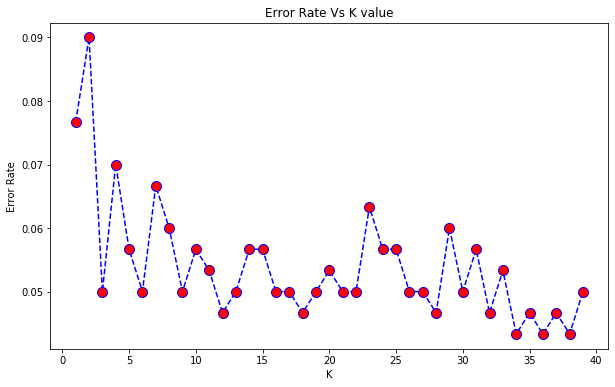

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed',marker= 'o', markerfacecolor='red',
         markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
'''
The graph shows minimum aronnd k =17, then as it increase it starts to bounce but not as much decrease.
35 is also low but it means a higher k which may affect accuracy.
'''

In [27]:
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[151   8]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.94      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
#We can squeeze a little more out our data by making k=17